 **SAYED SARA SHAUKAT HUSSAIN**

**DATA SCIENCE INTERN @CodSoft**

**TASK 3: TITANIC SURVIVAL PREDICTION**

### **GitHub Link**

https://github.com/sarasayed7/CodSoft

### **PROBLEM STATEMENT**

**Objective**


To develop a machine learning model that can accurately predict the survival of passengers on the Titanic based on various features such as age, sex, passenger class, fare, and other relevant attributes

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collecting and Processing

In [ ]:
titanic = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Getting some information about the titanic data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#check the number of missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Drop the "Cabin" column from the dataframe
titanic.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
#Replacing missing values in "Age" coulmn with mean value
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#Finding the mode value of "Embarked" coulmn
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
titanic['Embarked'].mode()[0]

'S'

In [ ]:
#Replacing missing values in "Emabarked" column with mode value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Getting some statistical measures about the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Finding number of people survived or not survived
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

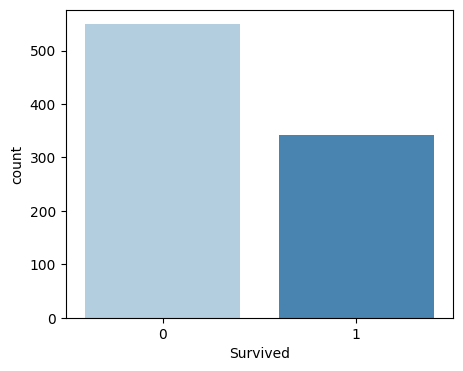

In [ ]:
#Making a countplot for "Survived" colu
plt.figure(figsize=(5,4), dpi=100)
sns.countplot(data=titanic, x='Survived', palette='Blues')
plt.show()

In [ ]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

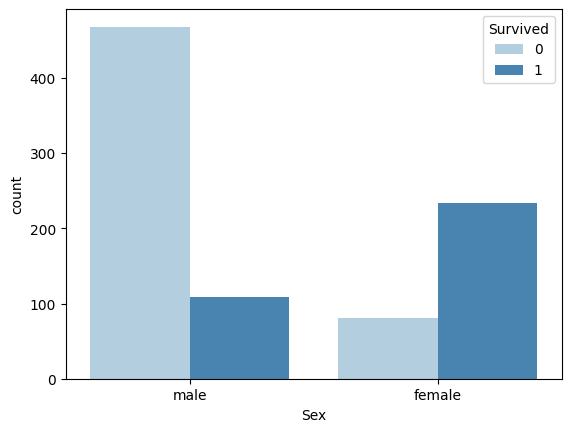

In [ ]:
#Number of people survived Gender wise
sns.countplot(data=titanic, x='Sex', hue='Survived', palette='Blues')
plt.show()

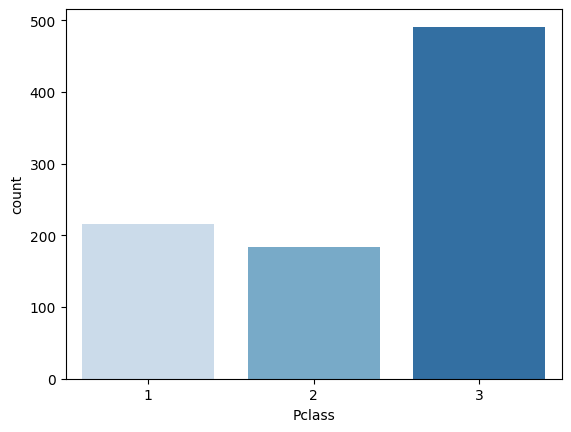

In [ ]:
#Making a countplot for "Pclass" column
sns.countplot(data=titanic, x='Pclass', palette='Blues')
plt.show()

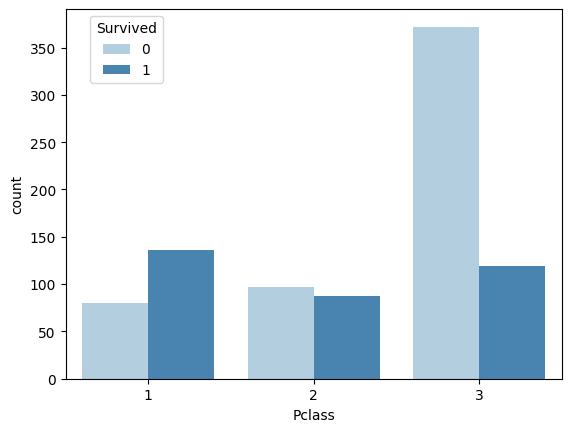

In [ ]:
#Number of people survived Class wise
sns.countplot(data=titanic, x='Pclass', hue='Survived', palette='Blues')
plt.legend(loc=(0.05,0.8), title='Survived')
plt.show()

In [ ]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
#Converting categorical values
titanic.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Seperating Features and Target

In [ ]:
X = titanic.drop(['PassengerId','Survived','Name','Ticket'], axis=1)
y = titanic['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
#Importing library fot splitting data into train and test set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (623, 7) (268, 7)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(891,) (623,) (268,)


Model Training using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
#Training the model
model.fit(X_train, y_train)

RandomForestClassifier()

Model Evaluation using Accuracy Score

In [ ]:
#Importing library for evaluating
from sklearn.metrics import accuracy_score

In [ ]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 1 1 1 0 1 0 0 

In [ ]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [ ]:
print('Accuraccy score of training data:', training_data_accuracy)

Accuraccy score of training data: 0.9839486356340289


In [ ]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1]


In [ ]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [ ]:
print('Accuarcy score of test data:', test_data_accuracy)

Accuarcy score of test data: 0.8097014925373134
